# Morphological Image Processing (Erosion and Dilation)

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

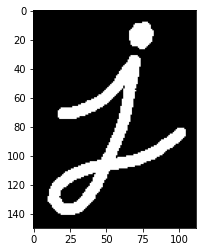

Shape:  (150, 112)


In [2]:
PATH = 'images/Morphology_Tutorial.png'
img = cv.imread(PATH, cv.IMREAD_GRAYSCALE)
row, col = img.shape[:2]

plt.imshow(img, cmap='gray')
plt.show()

print('Shape: ', img.shape)

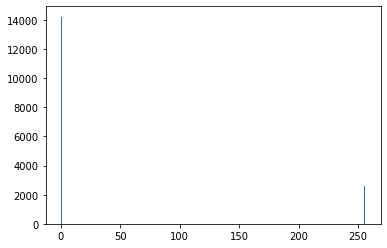

In [3]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

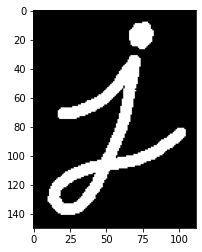

In [4]:
threshold, img_threshold = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
img_threshold = img_threshold / 255

plt.imshow(img_threshold, cmap='gray')
plt.show()

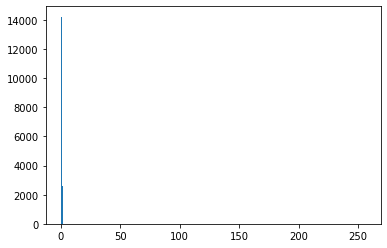

In [5]:
plt.hist(img_threshold.ravel(), 256, [0, 256])
plt.show()

In [6]:
structuring_element = np.ones((5, 5), np.uint8)
se_row, se_col = structuring_element.shape[:2]
padding = (se_row - 1) // 2

## Erosion

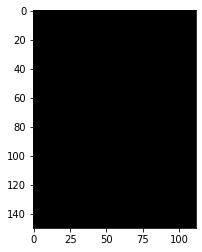

In [7]:
eroded = np.zeros((row, col), np.uint8)

plt.imshow(eroded, cmap='gray')
plt.show()

In [8]:
for i in range(row - int(np.ceil(se_row / 2))):
    for j in range(col - int(np.ceil(se_col / 2))):
        flag = True
        for x in range(se_row):
            for y in range(se_col):
                if img_threshold[i + x - padding][j + y - padding] != structuring_element[x][y]:
                    flag = False
        
        eroded[i + padding][j + padding] = 255 if flag else 0
        flag = True

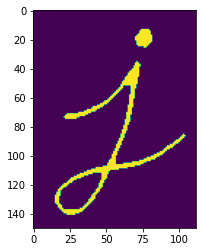

In [9]:
plt.imshow(eroded)
plt.show()

# Dilation

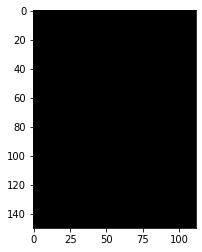

In [10]:
dilated = np.zeros((row, col), np.uint8)

plt.imshow(dilated, cmap='gray')
plt.show()

In [11]:
for i in range(row - int(np.ceil(se_row / 2))):
    for j in range(col - int(np.ceil(se_col / 2))):
        flag = False
        for x in range(se_row):
            for y in range(se_col):
                r, c = i + x - padding, j + y - padding
                if img_threshold[r][c] == structuring_element[x][y] and img_threshold[r][c] == 1:
                    flag = True
        
        dilated[i + padding][j + padding] = 255 if flag else 0
        flag = False

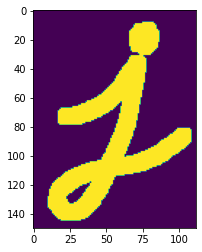

In [12]:
plt.imshow(dilated)
plt.show()

In [13]:
image_eroded = cv.erode(img_threshold, structuring_element, iterations=1)
image_dilated = cv.dilate(img_threshold, structuring_element, iterations=1)

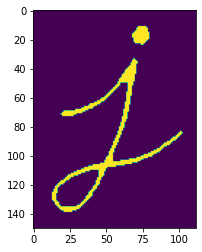

In [14]:
plt.imshow(image_eroded)
plt.show()

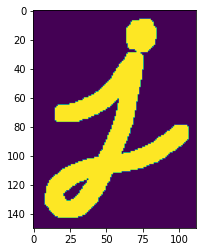

In [15]:
plt.imshow(image_dilated)
plt.show()

## Opening and Closing

Opening is just another name of **erosion followed by dilation**. It is useful in removing noise.

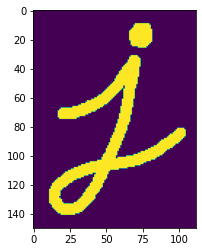

In [16]:
image_opened = cv.morphologyEx(img_threshold, cv.MORPH_OPEN, structuring_element)

plt.imshow(image_opened)
plt.show()

Closing is reverse of Opening, **Dilation followed by Erosion**. It is useful in closing small holes inside the foreground objects, or small black points on the object.

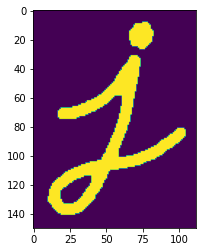

In [17]:
image_closed = cv.morphologyEx(img_threshold, cv.MORPH_CLOSE, structuring_element)

plt.imshow(image_closed)
plt.show()

## Morphological Gradient

Difference between dilation & erosion

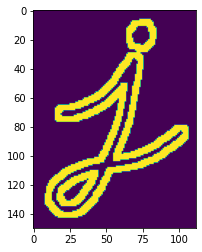

In [18]:
image_gradient = cv.morphologyEx(img_threshold, cv.MORPH_GRADIENT, structuring_element)

plt.imshow(image_gradient)
plt.show()

## Top Hat Transform

It is the difference between input image and Opening of the image.

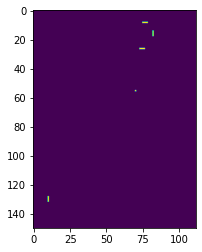

In [19]:
image_tophat = cv.morphologyEx(img_threshold, cv.MORPH_TOPHAT, structuring_element)

plt.imshow(image_tophat)
plt.show()

## Black Hat Transform

It is the difference between the closing of the input image and input image.

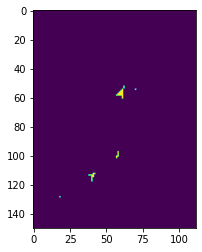

In [20]:
image_blackhat = cv.morphologyEx(img_threshold, cv.MORPH_BLACKHAT, structuring_element)

plt.imshow(image_blackhat)
plt.show()

## Structural Elements

In [21]:
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
ellipse_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

print('Rectangular Kernel: \n', rect_kernel)
print('Cross Kernel: \n', cross_kernel)
print('Elliptical Kernel: \n', ellipse_kernel)

Rectangular Kernel: 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Cross Kernel: 
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
Elliptical Kernel: 
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
